In [16]:
import pandas as pd
df = pd.read_csv('abs_data.csv',index_col=0)

In [17]:
df

,FrEM_1.5_0_0,FrEM_1.5_0_1,FrEM_1.5_0_2,FrEM_1.5_0_3,FrEM_1.5_0_4,FrEM_1.5_0_5,FrEM_1.5_0_6,FrEM_1.5_0_7,FrEM_1.5_0_8,FrEM_1.5_1_0,...,FrEM_1.5_8_0,FrEM_1.5_8_1,FrEM_1.5_8_2,FrEM_1.5_8_3,FrEM_1.5_8_4,FrEM_1.5_8_5,FrEM_1.5_8_6,FrEM_1.5_8_7,FrEM_1.5_8_8,COVID
0,100.994183,63.500354,23.764615,14.809006,10.132739,6.458623,6.079418,8.116356,6.566475,24.248562,...,2.626713,0.579372,0.493647,0.304215,0.524688,0.741711,0.647763,0.501151,0.800689,1.0
1,155.623148,56.797151,13.028535,6.626909,18.327383,21.185920,12.829356,8.488317,2.170785,28.747849,...,2.719659,0.752805,1.146061,0.545097,0.778240,0.335614,0.345323,0.875008,1.023703,1.0
2,129.221184,78.454162,35.385913,14.856545,22.996153,26.209789,3.273651,8.038485,13.874770,33.070410,...,2.618402,1.192939,1.087911,0.424599,0.430478,0.243887,1.101742,0.878708,0.708836,1.0
3,90.390971,52.613964,27.395924,19.762264,25.765934,19.968011,7.511855,17.745597,2.505243,34.382638,...,2.952575,1.119850,1.417656,1.717594,0.808168,0.905884,1.340841,0.749654,1.203081,1.0
4,20.972250,64.084754,9.752420,19.138170,7.501705,13.622549,5.201777,2.111775,3.481266,30.666826,...,2.827844,0.086999,0.472183,0.830620,0.773404,0.326004,0.659731,0.117143,0.404780,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
158,6.883127,75.264972,37.513623,3.360013,10.654520,49.700737,11.437420,5.577192,5.947142,21.614034,...,3.719056,0.876259,0.242514,0.708348,1.493365,0.884711,0.928730,0.120899,0.389623,1.0
159,6.130279,64.330357,41.198263,19.205122,21.965439,48.871614,6.544300,9.683875,5.499273,40.247950,...,3.263427,0.199190,1.144857,0.809338,1.104481,0.597626,0.689203,1.347732,1.088185,1.0
160,35.419916,48.890970,21.477339,15.127299,15.477263,22.964934,20.840057,11.159461,8.346220,19.458437,...,2.461005,0.641289,0.667741,0.294197,0.453574,0.765203,0.744904,0.553106,0.501509,1.0
161,92.766527,78.600015,6.381894,37.157894,6.636164,24.621536,23.325773,8.346363,4.789105,21.415190,...,2.478435,1.090052,1.412673,1.000815,1.118920,0.172935,0.991784,0.885456,0.506042,1.0


In [18]:
df.shape

(163, 82)

In [19]:
import seaborn as sns

<AxesSubplot: xlabel='COVID', ylabel='Count'>

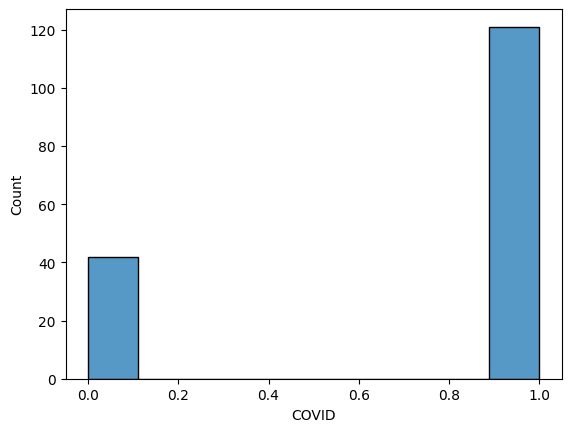

In [20]:
sns.histplot(data=df,x='COVID')

In [35]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

X = df[df.columns[:-1]]
Y = df[df.columns[-1]]

X_train, X_test, Y_train, Y_test = train_test_split(
    X,
    Y,
    test_size=0.2)

neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train, Y_train)
y_pred = neigh.predict(X_test)

print(classification_report(Y_test, y_pred))
print(accuracy_score(Y_test,y_pred))

              precision    recall  f1-score   support

         0.0       1.00      0.22      0.36         9
         1.0       0.77      1.00      0.87        24

    accuracy                           0.79        33
   macro avg       0.89      0.61      0.62        33
weighted avg       0.84      0.79      0.73        33

0.7878787878787878


In [ ]:
import random
import numpy as np

D = len(df.columns)-1
N = 100
T = 10000
F = 1  # mutation scaling factor

class Agent:

    def __init__(self) -> None:
        self.x = np.array(Agent.gen_rand_x(),dtype=np.float64)
        self.accuracy = 0
        self.N_sel=0

    def gen_rand_x() -> list[float]:
        x = []
        for col in df.columns[:-1]:
            lb = min(df[col])
            ub = max(df[col])
            x.append(lb+random.random()*(ub-lb))
        return x

    def fitness_func(self) -> float:
        def to_binary(self):
            bin = []
            for x_i in self.x:
                eq = 1/(1+np.exp(-x_i))
                bin.append(eq > 0.5)
            return bin

        bin = to_binary(self)

        N_sel = bin.count(True)
        self.N_sel = N_sel

        to_delete = [df.columns[i] for i in range(len(bin)) if bin[i] == False]

        df1 = df.drop(to_delete, axis='columns')

        X = df1[df1.columns[:-1]]
        Y = df1[df1.columns[-1]]

        X_train, X_test, Y_train, Y_test = train_test_split(
            X,
            Y,
            test_size=0.2,
            random_state=41
        )

        neigh = KNeighborsClassifier(n_neighbors=3)
        neigh.fit(X_train, Y_train)
        y_pred = neigh.predict(X_test)

        error = np.sum(y_pred == Y_test)/len(y_pred)

        beta = random.random()

        self.accuracy = accuracy_score(Y_test, y_pred)

        return beta*error+(1-beta)*N_sel/D

    def Chain_Cyclone(self, t: float, i: int, x_best: np.array, agents: list['Agent']) -> None:
        r = np.array([random.random() for i in range(len(self.x))])
        if random.random() < 0.5:
            r1 = random.random()
            beta = 2*np.exp(r1*(T-t+1)/T)*np.sin(2*np.pi*r1)
            if (t/T < random.random()):
                # eq 13
                if (i == 0):
                    self.x = x_best+r*(x_best-self.x)+beta*(x_best-self.x)
                else:
                    self.x = x_best+r * \
                        (agents[i-1].x-self.x)+beta*(x_best-self.x)
            else:
                # eq 15
                x_rand = Agent.gen_rand_x()
                if (i == 0):
                    self.x = x_rand+r*(x_rand-self.x)+beta*(x_rand-self.x)
                else:
                    self.x = x_rand+r*(agents[i-1].x-self.x)+beta*(x_rand-self.x)
        else:
            # eq 11
            alpha = 2*np.sqrt(np.log(np.linalg.norm(r)))*r
            if (i == 0):
                self.x = self.x+r*(x_best-self.x)+alpha*(x_best-self.x)
            else:
                self.x = self.x+r*(agents[i-1].x-self.x)+alpha*(x_best-self.x)

    def Somersault(self, x_best: np.array):
        S = 2
        r2 = random.random()
        r3 = random.random()
        self.x = self.x + S*(r2*x_best-r3*self.x)

    def DE(self, i: int, agents: list['Agent']) -> None:
        x_r1 = agents[random.choice(
            [j for j in range(len(agents)) if j != i])].x
        x_r2 = agents[random.choice(
            [j for j in range(len(agents)) if j != i])].x
        x_r3 = agents[random.choice(
            [j for j in range(len(agents)) if j != i])].x

        # probability already satisfied

        V = Agent()
        V.x = x_r1 + F*(x_r2 - x_r3)

        if (V.fitness_func() < self.fitness_func()):
            self.x = V.x


def calc_Pr(i: int, ffs: list[float]) -> float:
    sum = np.sum(ffs)
    return ffs[i]/sum


agents = [Agent() for i in range(N)]
t = 0
best_ind = 0
while (agents[best_ind].accuracy < 0.9):
    ffs = [agent.fitness_func() for agent in agents]

    best_ind = np.argmin(ffs)

    print(agents[best_ind].accuracy)

    for i in range(len(agents)):
        agents[i].Chain_Cyclone(t, i, agents[best_ind].x, agents)

    for i in range(len(agents)):
        Pr = calc_Pr(i, ffs)
        if Pr < 0.5:
            agents[i].Somersault(agents[best_ind].x)
        else:
            agents[i].DE(i, agents)

    t += 1

best_bin = agents[best_ind].to_binary()

to_delete = [df.columns[i] for i in range(len(best_bin)) if best_bin[i] == True]

print('Accuracy',agents[best_ind].accuracy,'N_sel',agents[best_ind].N_sel)

In [ ]:
df1 = df.drop(to_delete, axis='columns')

X = df1[df1.columns[:-1]]
Y = df1[df1.columns[-1]]
X_train, X_test, Y_train, Y_test = train_test_split(
    X,
    Y,
    test_size=0.2,
    random_state=41)

neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train, Y_train)
y_pred = neigh.predict(X_test)

print(classification_report(Y_test, y_pred))
print(accuracy_score(Y_test,y_pred))